## Sun God Environment

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


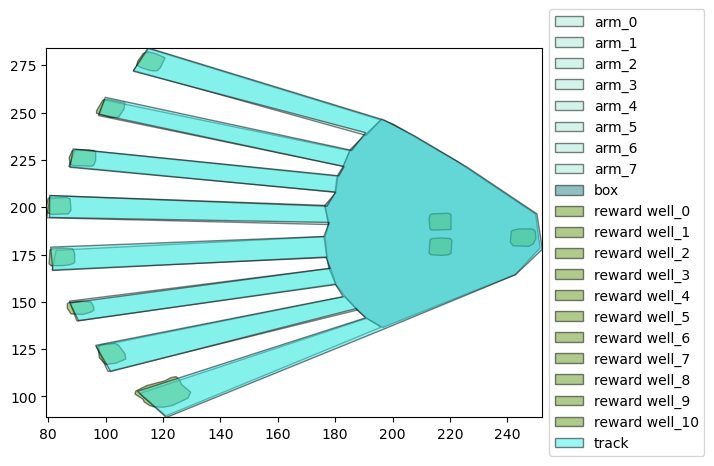

In [1]:
import matplotlib.pyplot as plt
from non_local_detector.environment.regions import (
    load_cvat_xml,
)
from non_local_detector.environment.transforms import scale_2d, flip_y
from non_local_detector.environment.regions.plot import plot_regions

CM_PER_PIXEL = 1 / 3.14
frame_size_px = (1292, 964)  # width, height in pixels
T = scale_2d(CM_PER_PIXEL) @ flip_y(frame_height_px=frame_size_px[1])

img_path = "/Users/edeno/Downloads/frame0.jpg"

sungod_regions = load_cvat_xml(
    xml_path="/Users/edeno/Downloads/sungod_annotation.xml", pixel_to_world=T
)


fig, ax = plt.subplots()
plot_regions(sungod_regions, ax=ax, add_legend=True)

In [2]:
sungod_regions.to_dataframe()

,name,kind,geom,metadata,area
0,arm_0,polygon,"{'type': 'Polygon', 'coordinates': (((111.7770...","{'source_xml': 'sungod_annotation.xml', 'color...",946.266973
1,arm_1,polygon,"{'type': 'Polygon', 'coordinates': (((100.8057...","{'source_xml': 'sungod_annotation.xml', 'color...",1009.080571
2,arm_2,polygon,"{'type': 'Polygon', 'coordinates': (((89.95222...","{'source_xml': 'sungod_annotation.xml', 'color...",891.318715
3,arm_3,polygon,"{'type': 'Polygon', 'coordinates': (((82.71656...","{'source_xml': 'sungod_annotation.xml', 'color...",1008.811296
4,arm_4,polygon,"{'type': 'Polygon', 'coordinates': (((177.9745...","{'source_xml': 'sungod_annotation.xml', 'color...",1060.549911
5,arm_5,polygon,"{'type': 'Polygon', 'coordinates': (((89.42993...","{'source_xml': 'sungod_annotation.xml', 'color...",829.529139
6,arm_6,polygon,"{'type': 'Polygon', 'coordinates': (((97.49999...","{'source_xml': 'sungod_annotation.xml', 'color...",760.791067
7,arm_7,polygon,"{'type': 'Polygon', 'coordinates': (((109.6592...","{'source_xml': 'sungod_annotation.xml', 'color...",985.614858
8,box,polygon,"{'type': 'Polygon', 'coordinates': (((196.5573...","{'source_xml': 'sungod_annotation.xml', 'color...",5285.529880
9,reward well_0,polygon,"{'type': 'Polygon', 'coordinates': (((220.0636...","{'source_xml': 'sungod_annotation.xml', 'color...",66.686275


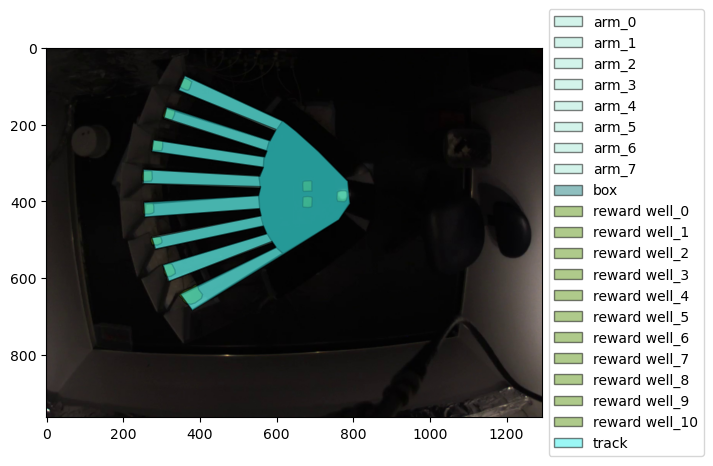

In [3]:
fig, ax = plt.subplots()
ax.imshow(plt.imread(img_path))
plot_regions(sungod_regions, ax=ax, add_legend=True, world_to_pixel=T.inverse())

In [4]:
from non_local_detector.environment import (
    Environment,
    list_available_layouts,
    get_layout_parameters,
)

list_available_layouts()

['Graph',
 'Hexagonal',
 'ImageMask',
 'MaskedGrid',
 'RegularGrid',
 'ShapelyPolygon',
 'TriangularMesh']

In [5]:
get_layout_parameters("TriangularMesh")

{'boundary_polygon': {'annotation': 'Polygon',
  'default': None,
  'kind': 'positional or keyword'},
 'point_spacing': {'annotation': 'float',
  'default': None,
  'kind': 'positional or keyword'}}

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

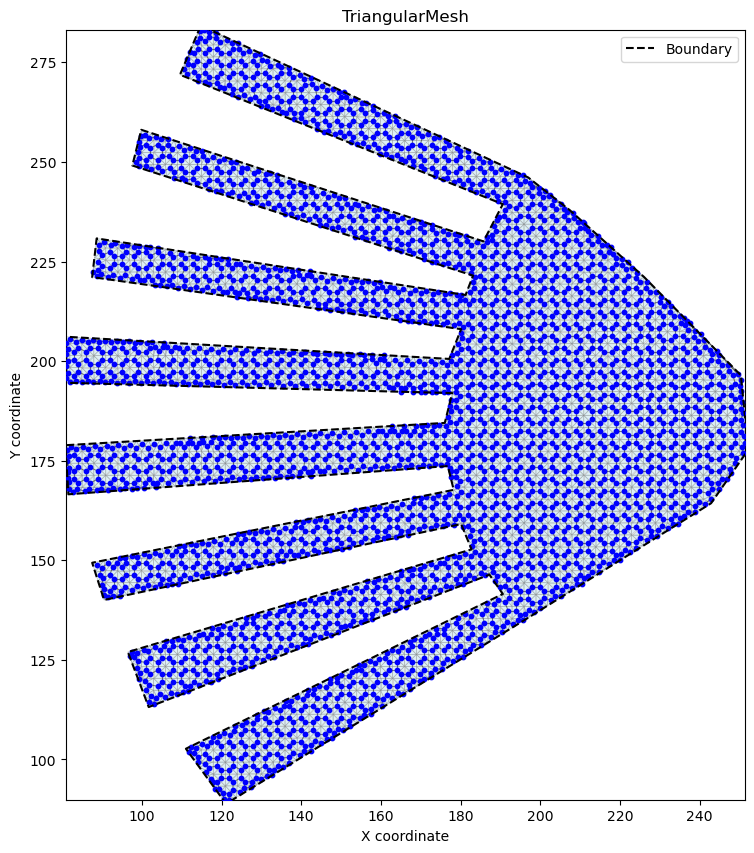

In [6]:
sungod_env = Environment.from_layout(
    kind="TriangularMesh",
    layout_params={"boundary_polygon": sungod_regions["track"].data, "point_spacing": 3.0},
    regions=sungod_regions,
)

fig, ax = plt.subplots(figsize=(10, 10))
sungod_env.plot(ax=ax)

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

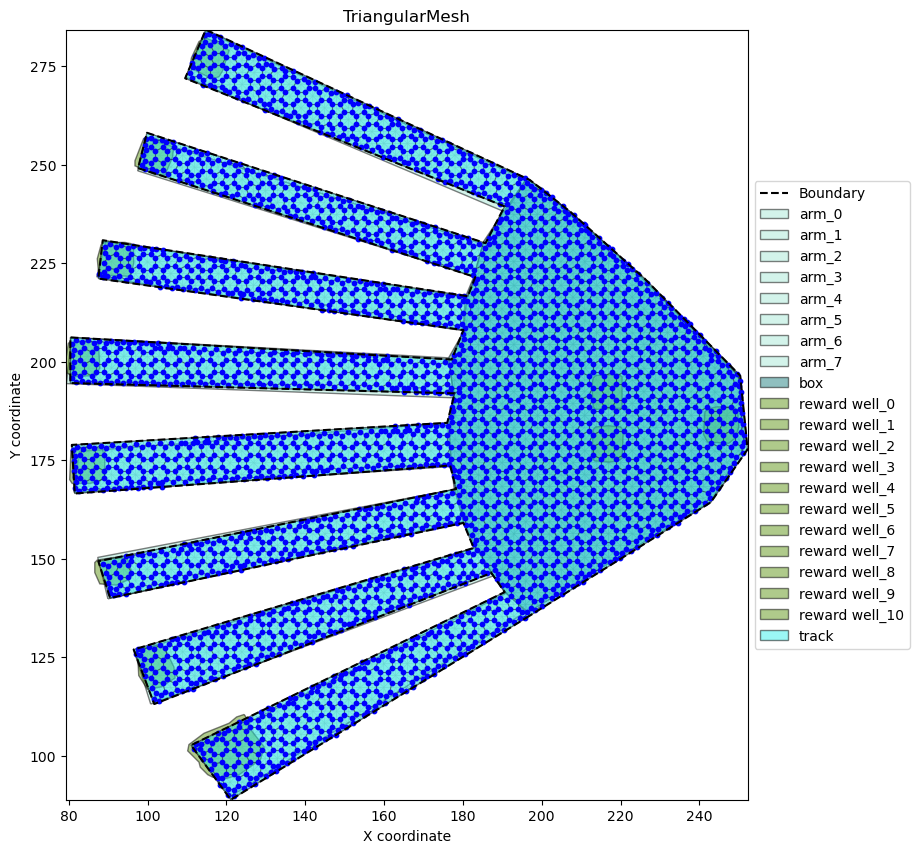

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sungod_env.plot(ax=ax, show_regions=True)

## Hex Maze Environment

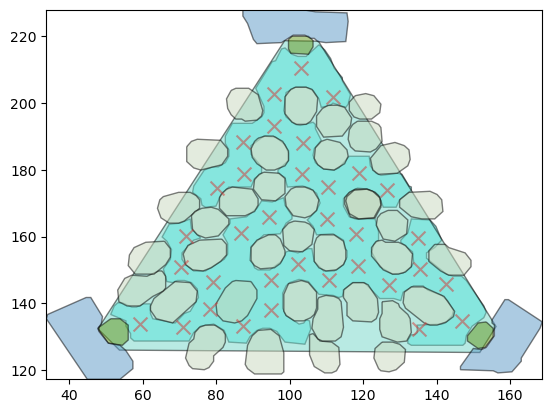

In [8]:
from non_local_detector.environment.regions.plot import plot_regions


CM_PER_PIXEL = 1 / 3.14
frame_size_px = (1280, 720)  # width, height in pixels
T = scale_2d(CM_PER_PIXEL) @ flip_y(frame_height_px=frame_size_px[1])

hex_maze_regions = load_cvat_xml(
    xml_path="/Users/edeno/Downloads/hex_maze_annotation.xml", pixel_to_world=T
)


fig, ax = plt.subplots()

plot_regions(hex_maze_regions, ax=ax, add_legend=False)

In [9]:
hex_maze_regions.to_dataframe()

,name,kind,geom,metadata,area
0,track,polygon,"{'type': 'Polygon', 'coordinates': (((107.9617...","{'source_xml': 'hex_maze_annotation.xml', 'col...",2822.021177
1,arena,polygon,"{'type': 'Polygon', 'coordinates': (((47.80254...","{'source_xml': 'hex_maze_annotation.xml', 'col...",5786.138119
2,barrier_0,polygon,"{'type': 'Polygon', 'coordinates': (((101.2738...","{'source_xml': 'hex_maze_annotation.xml', 'col...",63.491420
3,barrier_1,polygon,"{'type': 'Polygon', 'coordinates': (((91.40127...","{'source_xml': 'hex_maze_annotation.xml', 'col...",81.240618
4,barrier_2,polygon,"{'type': 'Polygon', 'coordinates': (((84.07643...","{'source_xml': 'hex_maze_annotation.xml', 'col...",76.879387
...,...,...,...,...,...
74,hex centers_29,point,"[87.38535031847132, 133.24840764331208]","{'source_xml': 'hex_maze_annotation.xml', 'col...",0.000000
75,hex centers_30,point,"[70.86624203821655, 132.984076433121]","{'source_xml': 'hex_maze_annotation.xml', 'col...",0.000000
76,hex centers_31,point,"[78.29299363057325, 138.33439490445858]","{'source_xml': 'hex_maze_annotation.xml', 'col...",0.000000
77,hex centers_32,point,"[59.16878980891719, 133.88535031847132]","{'source_xml': 'hex_maze_annotation.xml', 'col...",0.000000


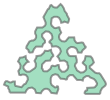

In [10]:
hex_maze_regions["track"].data

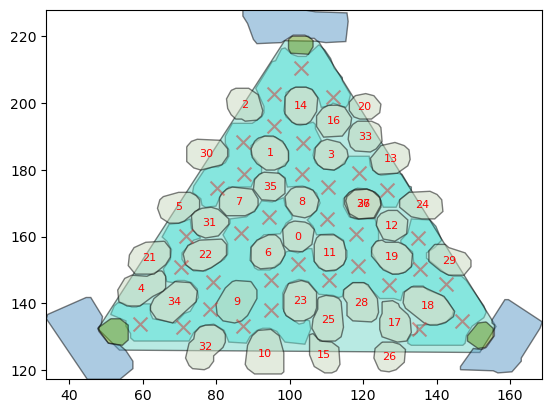

In [11]:

fig, ax = plt.subplots()
plot_regions(
    hex_maze_regions, ax=ax, add_legend=False
)
for region_name in hex_maze_regions:
    region = hex_maze_regions[region_name]
    if region.name.startswith("barrier"):

        ax.text(
            region.data.centroid.x, region.data.centroid.y,
            region.name.split("_")[-1],
            fontsize=8,
            color="red",
            ha="center",
            va="center",
        )

In [23]:
boundary_polygon = hex_maze_regions["track"].data - hex_maze_regions["barrier_9"].data
hex_maze_env = Environment.from_layout(
    kind="TriangularMesh", layout_params={"boundary_polygon": boundary_polygon, "point_spacing": 3.0},
    regions=hex_maze_regions,
)

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

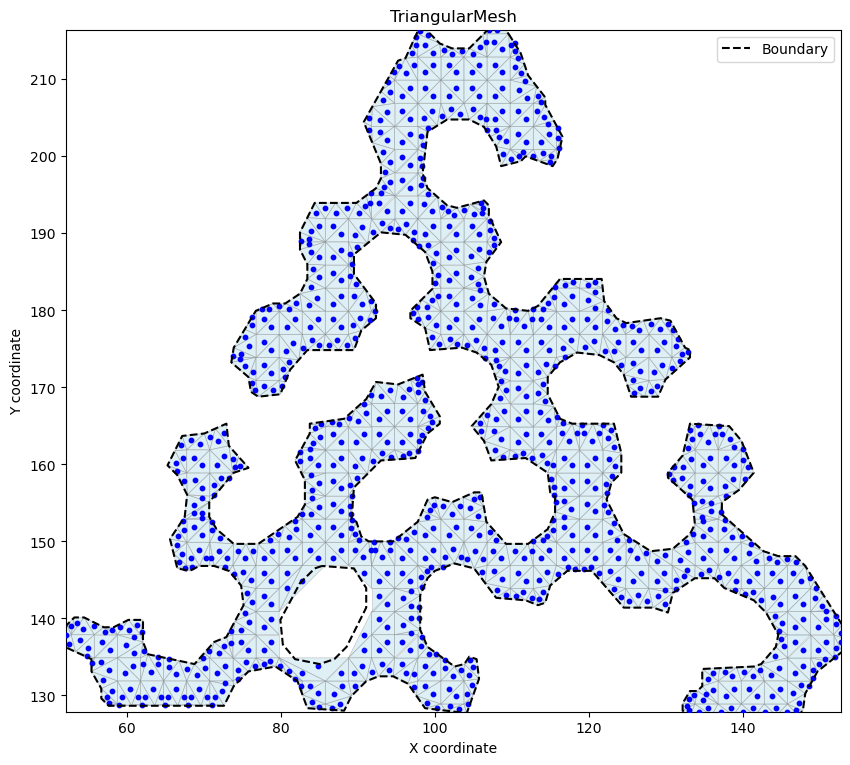

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env.plot(ax=ax, show_connectivity=False)


<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

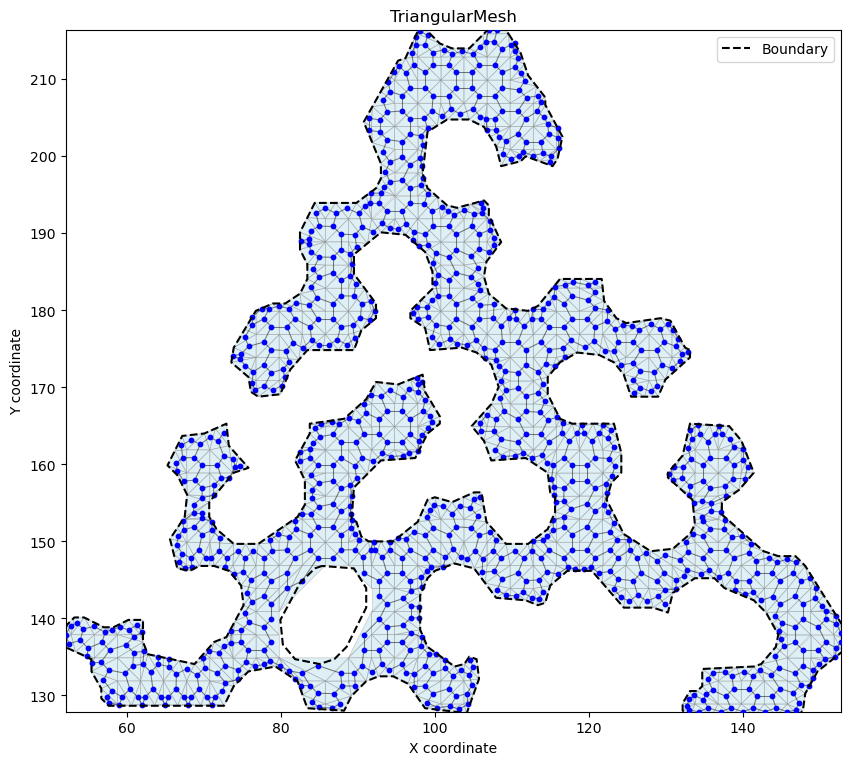

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env.plot(ax=ax, show_connectivity=True)

<Axes: title={'center': 'TriangularMesh'}, xlabel='X coordinate', ylabel='Y coordinate'>

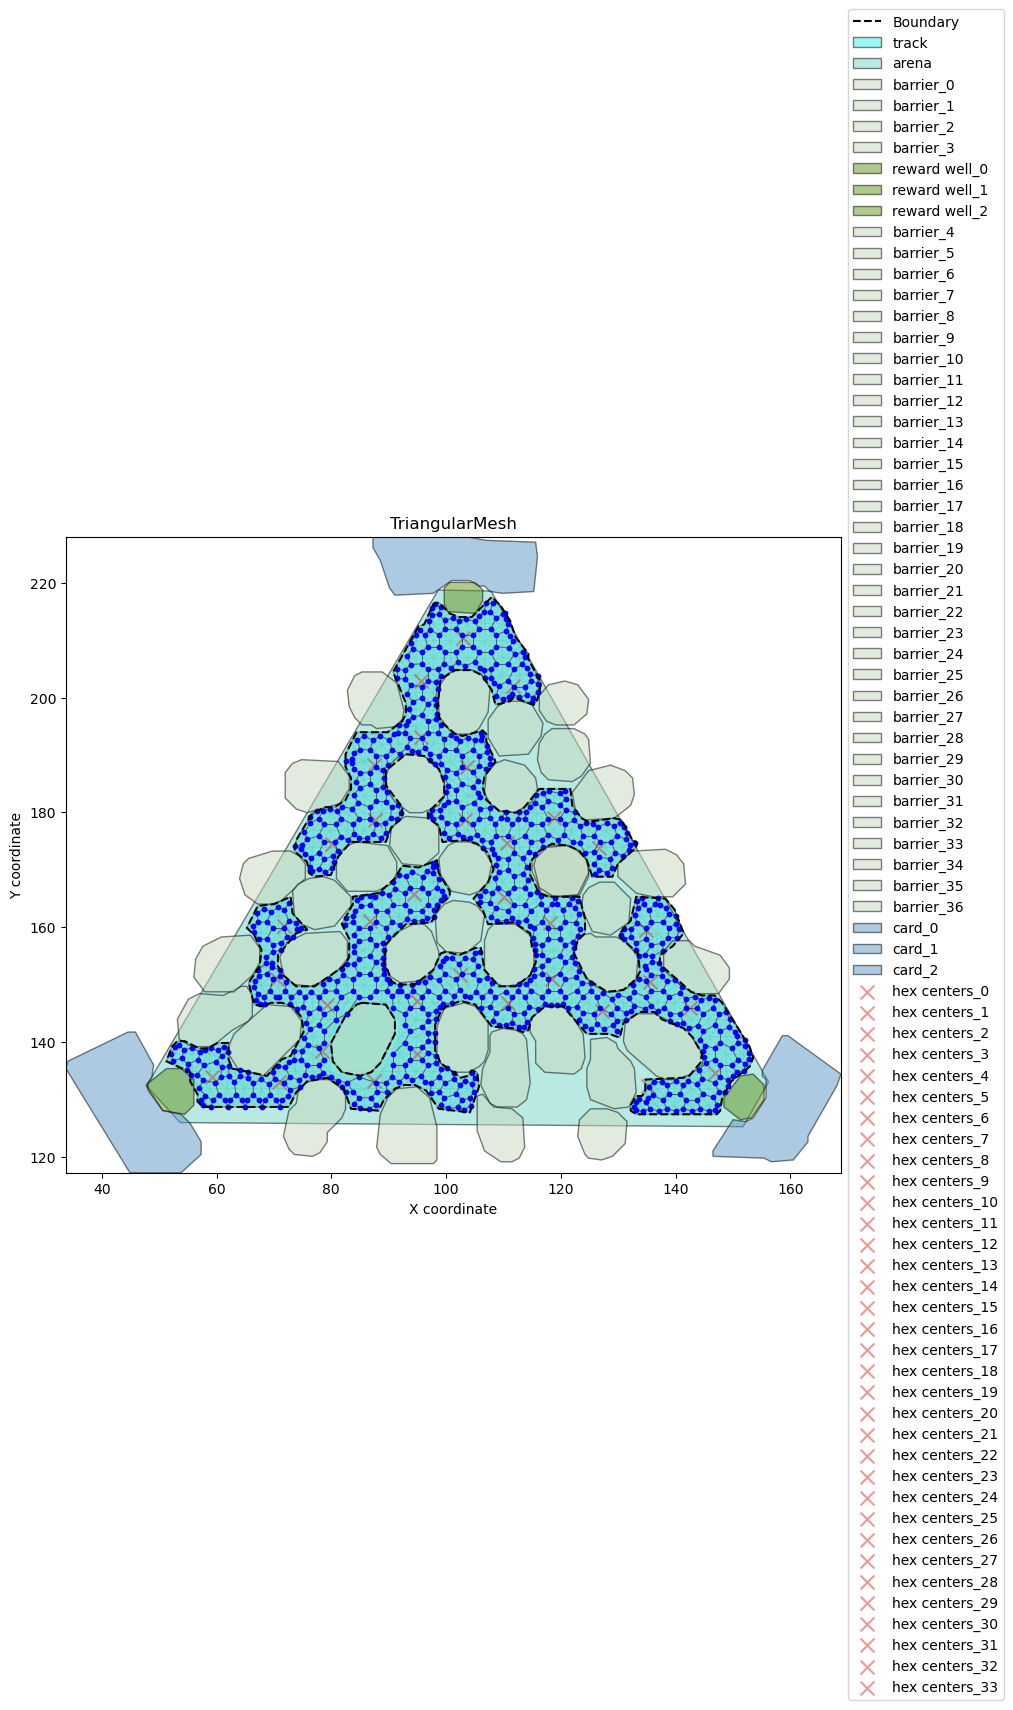

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env.plot(ax=ax, show_regions=True)

In [15]:
hex_maze_env2 = Environment.from_layout(
    kind="ShapelyPolygon",
    layout_params={"polygon": boundary_polygon, "bin_size": 2.0},
    regions=hex_maze_regions,
)

<Axes: title={'center': 'ShapelyPolygon (2D Grid)'}, xlabel='Dimension 0', ylabel='Dimension 1'>

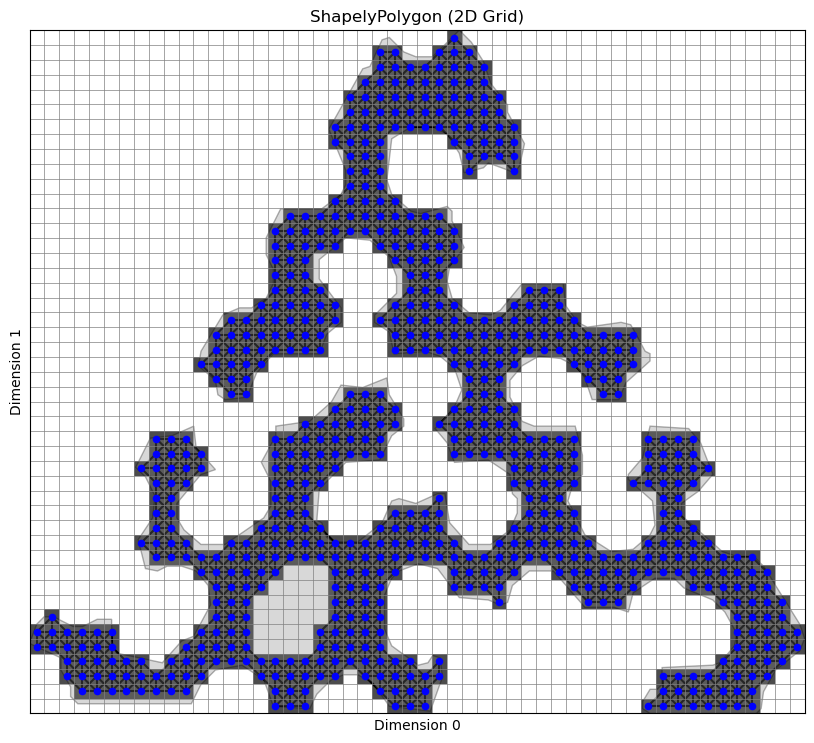

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env2.plot(ax=ax)

<Axes: title={'center': 'ShapelyPolygon (2D Grid)'}, xlabel='Dimension 0', ylabel='Dimension 1'>

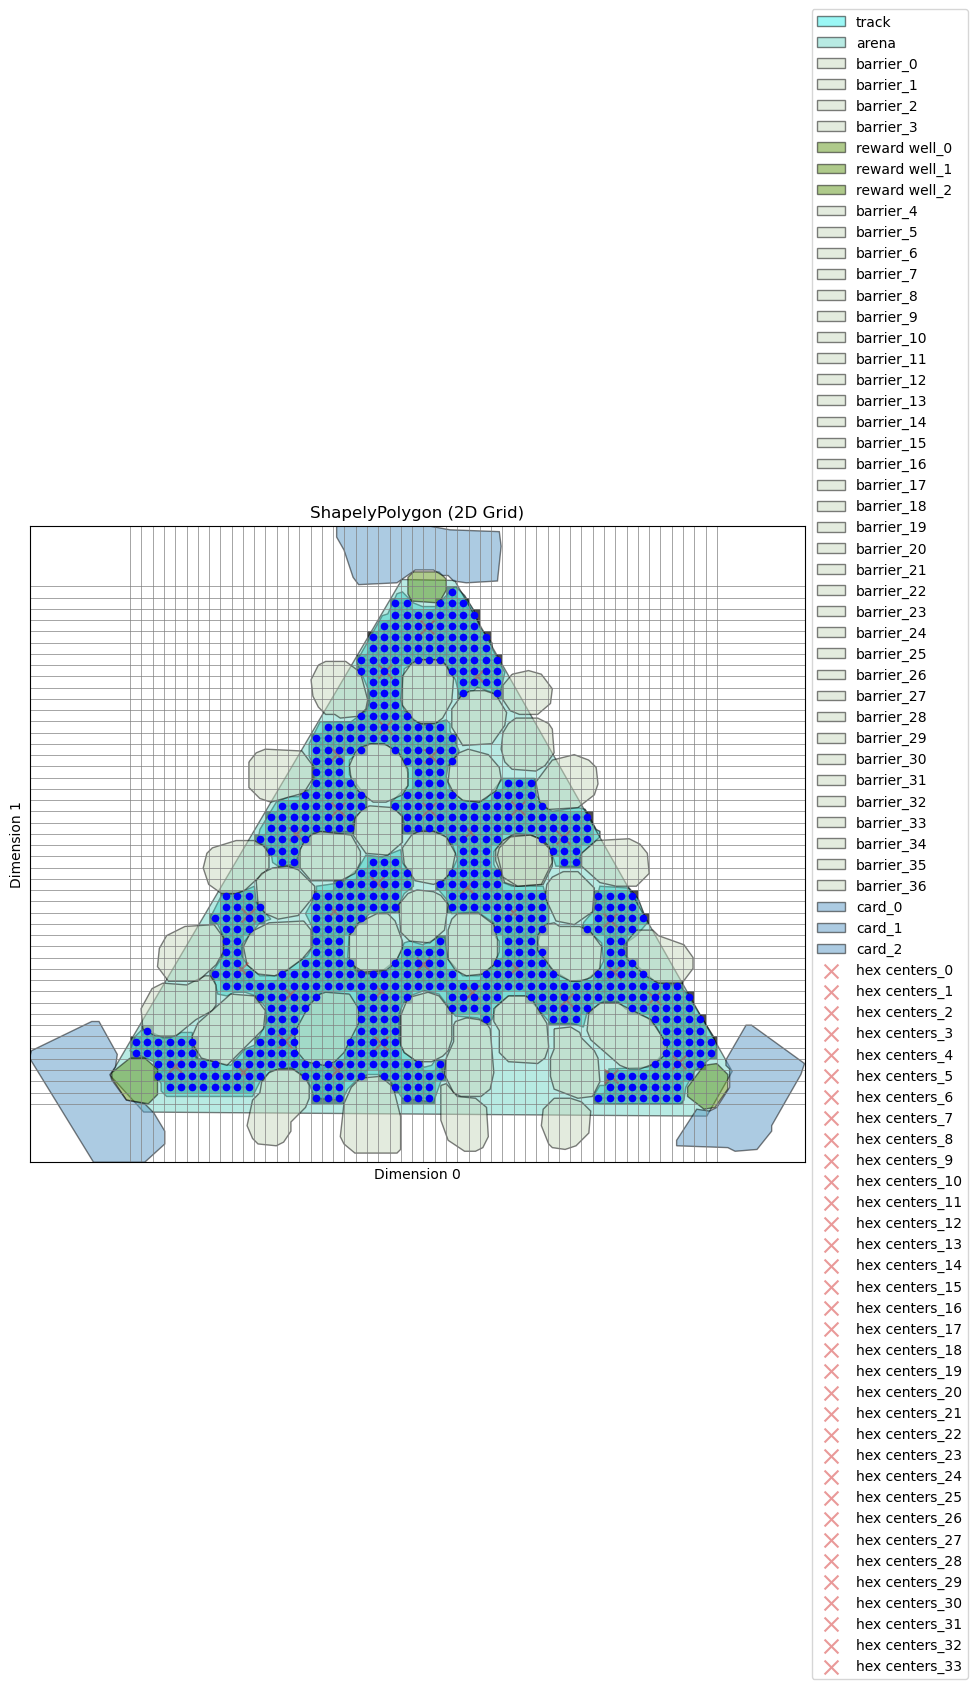

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
hex_maze_env2.plot(ax=ax, show_regions=True)

In [27]:
hex_maze_env.n_bins

987

In [22]:
hex_maze_env2.n_bins

713